# Imports

In [1]:
import numpy as np

from genome import Genome
from player import Player
from population import Population
from game import Game

# Setup

In [2]:
history = []

# Genome Testing

## Genomes

Initializing genome1
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []




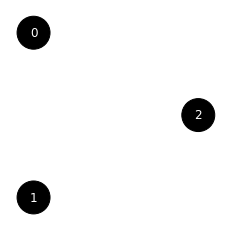

In [3]:
print("Initializing genome1")
genome1 = Genome(1, 1)
genome1.print_state()
genome1.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.7228,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=-0.7228,I=0,E=1)]




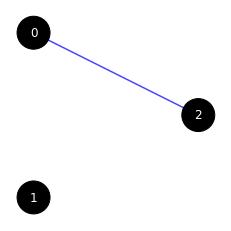

In [4]:
print("General mutation")
nodes, connections = genome1.mutate_genome(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.7228,I=0,E=1)]
	History: [History(0->2,I=0,L=[])]




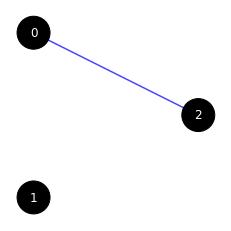

In [5]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=0.2735,I=1,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=0.2735,I=1,E=1)]




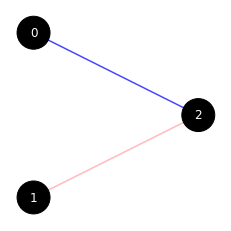

In [6]:
print("Gene mutation")
connection = genome1.mutate_connection(history)
genome1.print_state(history=history, connections=[connection])
genome1.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




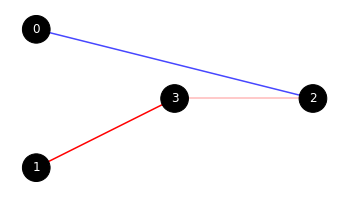

In [7]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Initializing genome2
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]




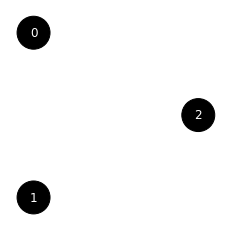

In [8]:
print("Initializing genome2")
genome2 = Genome(1, 1)
genome2.print_state(history=history)
genome2.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=0.9163,I=0,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=0.9163,I=0,E=1)]




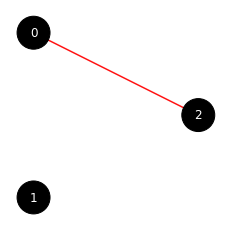

In [9]:
print("General mutation")
nodes, connections = genome2.mutate_genome(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=0.9163,I=0,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]




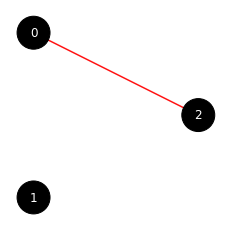

In [10]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=0.4932,I=1,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=0.4932,I=1,E=1)]




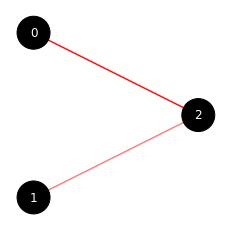

In [11]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




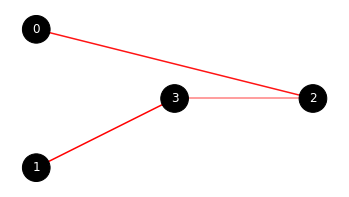

In [12]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [None]




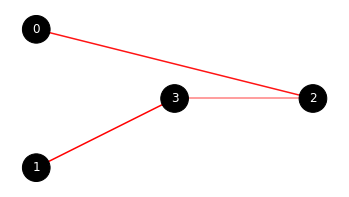

In [13]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6])]

	Mutations
	Nodes: [Node(4,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]

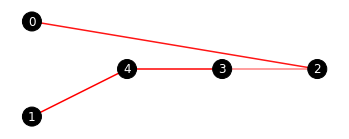

In [14]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 9, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(4->2,I=8,L=[0, 1, 2, 3, 4, 5, 6, 7])]

	Mutations
	Connections: [Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1)]




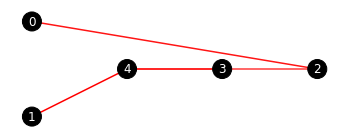

In [15]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]
	History: [History(0->2,I=0,L=[]), History(1->2,I=1,L=[0]), History(1->3,I=2,L=[0, 1]), History(3->2,I=3,L=[0, 1, 2]), History(0->3,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 

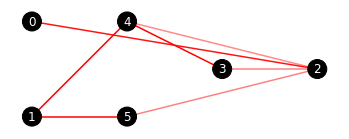

In [16]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

## Crossover

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




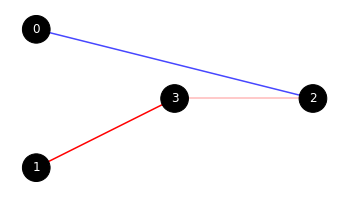

In [17]:
print("genome1")
genome1.print_state()
genome1.draw_state()

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]




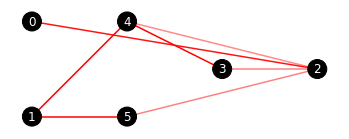

In [18]:
print("genome2")
genome2.print_state()
genome2.draw_state()

Crossover genome1 with genome 2 to create genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=0), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




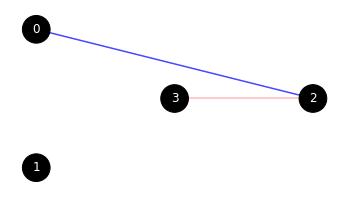

In [19]:
print("Crossover genome1 with genome 2 to create genome3")
genome3 = genome1.crossover(genome2)
genome3.print_state()
genome3.draw_state()

Crossover genome2 with genome 1 to create genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]




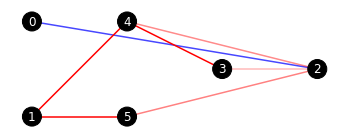

In [20]:
print("Crossover genome2 with genome 1 to create genome4")
genome4 = genome2.crossover(genome1)
genome4.print_state()
genome4.draw_state()

## Cloning

Clone genome1 to create genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]




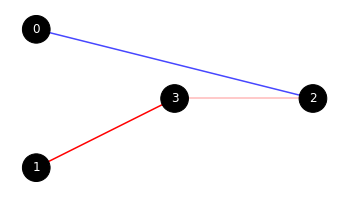

In [21]:
print("Clone genome1 to create genome5")
genome5 = genome1.clone()
genome5.print_state()
genome5.draw_state()

Clone genome2 to create genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]




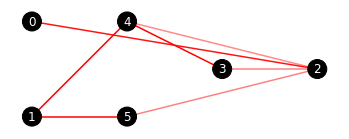

In [22]:
print("Clone genome2 to create genome6")
genome6 = genome2.clone()
genome6.print_state()
genome6.draw_state()

## Propagation

genome1
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1)]


[0.35755076655400436]


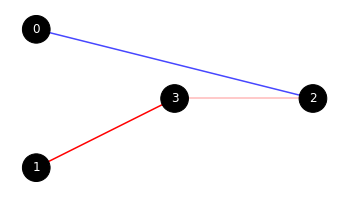

In [23]:
print("genome1")
out1 = genome1.forward_pass([1, 0.5])
genome1.print_state()
genome1.draw_state()
print(out1)

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]


[0.8370779257055243]


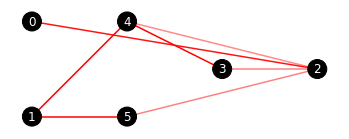

In [24]:
print("genome2")
genome2.print_state()
genome2.draw_state()
out2 = genome2.forward_pass([1, 0.5])
print(out2)

genome3
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=0), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.3267857170222027]


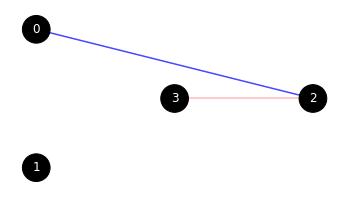

In [25]:
print("genome3")
genome3.print_state()
genome3.draw_state()
out3 = genome3.forward_pass([1, 0.5])
print(out3)

genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]


[0.47196215401349784]


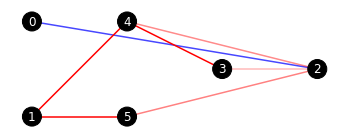

In [26]:
print("genome4")
genome4.print_state()
genome4.draw_state()
out4 = genome4.forward_pass([1, 0.5])
print(out4)

genome5
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.7228,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=0.2735,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=2,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=0.2735,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=4,E=1)]


[0.35755076655400436]


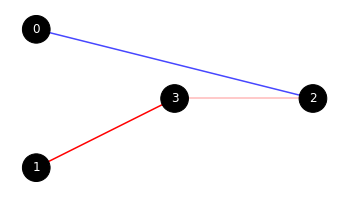

In [27]:
print("genome5")
genome5.print_state()
genome5.draw_state()
out5 = genome5.forward_pass([1, 0.5])
print(out5)

genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=0.9163,I=0,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=0.4932,I=1,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=2,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=0.4932,I=3,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=0.4543,I=8,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=9,E=1), Gene(Node(5,L=1)->Node(2,L=3),W=0.4932,I=10,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=11,E=1)]


[0.8370779257055243]


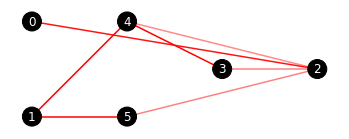

In [28]:
print("genome6")
genome6.print_state()
genome6.draw_state()
out6 = genome6.forward_pass([1, 0.5])
print(out6)

# Player Testing

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 0, []




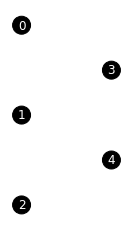

In [29]:
history = []

player = Player(2, 2)
player.nn.print_state()
player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(4,L=1),W=-0.9871,I=0,E=1)]




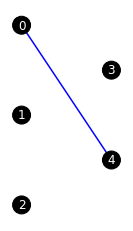

In [30]:
player.mutate(history)
player.nn.print_state()
player.nn.draw_state()

In [31]:
inputs = [1] + np.random.randint(2, size=2).tolist()
decision = player.decide(inputs)
print(inputs, player.nn.forward_pass(inputs), decision)

[1, 0, 0] [0.5, 0.2714794515392036] 0


# Population Testing

In [32]:
population = Population(1000, 2, 2)
players = population.new_generation()
game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()
print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness))

Innovation History: [History(2->3,I=0,L=[]), History(2->4,I=1,L=[]), History(0->3,I=2,L=[]), History(1->3,I=3,L=[]), History(0->4,I=4,L=[]), History(1->4,I=5,L=[]), History(1->5,I=6,L=[3]), History(5->3,I=7,L=[3, 6]), History(0->5,I=8,L=[3, 6, 7]), History(2->5,I=9,L=[0]), History(5->3,I=10,L=[0, 9]), History(0->5,I=11,L=[0, 9, 10])]
Number of Species: 8
Species 0 - Players: 89, Average Fitness: 6.0000
Species 1 - Players: 84, Average Fitness: 6.3690
Species 2 - Players: 81, Average Fitness: 6.2222
Species 3 - Players: 83, Average Fitness: 6.2530
Species 4 - Players: 86, Average Fitness: 6.1163
Species 5 - Players: 80, Average Fitness: 6.1125
Species 6 - Players: 1, Average Fitness: 7.0000
Species 7 - Players: 1, Average Fitness: 4.0000


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.5450,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.4818,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.6082,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.2170,I=1,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=0.7227,I=1,E=1)]




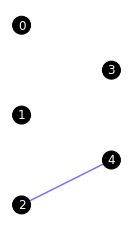

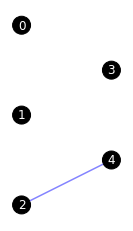

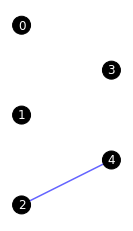

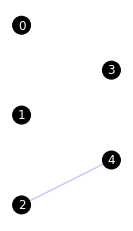

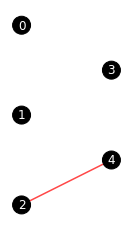

In [33]:
species = population.species[0]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(4,L=1),W=-0.5450,I=1,E=1)]


[1, 1, 1] [0.5, 0.36701710988310765] 0 1
[1, 0, 0] [0.5, 0.5] 0 2
[1, 0, 0] [0.5, 0.5] 0 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 1, 0] [0.5, 0.5] 0 3
[1, 1, 1] [0.5, 0.36701710988310765] 0 4
[1, 0, 1] [0.5, 0.36701710988310765] 0 4
[1, 0, 1] [0.5, 0.36701710988310765] 0 4


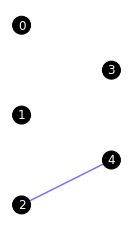

In [34]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(1,L=0)->Node(3,L=2),W=0.7293,I=3,E=0), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=8,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=0.7293,I=7,E=1)]




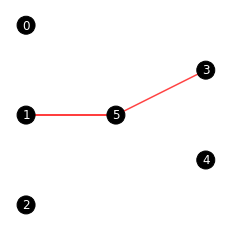

In [35]:
species = population.species[np.argmin([len(s.players) for s in population.species])]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(1,L=0)->Node(3,L=2),W=0.7293,I=3,E=0), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=8,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=0.7293,I=7,E=1)]


[1, 1, 1] [0.6746606030476651, 0.5] 0 1
[1, 1, 1] [0.6746606030476651, 0.5] 0 2
[1, 1, 1] [0.6746606030476651, 0.5] 0 3
[1, 0, 1] [0.5, 0.5] 0 3
[1, 0, 1] [0.5, 0.5] 0 3
[1, 0, 1] [0.5, 0.5] 0 3
[1, 1, 0] [0.6746606030476651, 0.5] 0 3
[1, 0, 0] [0.5, 0.5] 0 4
[1, 1, 0] [0.6746606030476651, 0.5] 0 4
[1, 1, 0] [0.6746606030476651, 0.5] 0 4


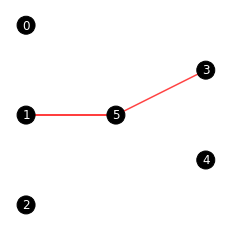

In [36]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

# Training Test

In [37]:
population = Population(1000, 2, 2)
players = population.new_generation()
game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
print("Players: %d" % population.culled_population_size)
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 15
Species: 9
Players: 507
Species 0 - Players: 84, Average Fitness: 6.3571, Max Fitness: 9.0000
Species 1 - Players: 79, Average Fitness: 6.1013, Max Fitness: 9.0000
Species 2 - Players: 87, Average Fitness: 6.1954, Max Fitness: 9.0000
Species 3 - Players: 82, Average Fitness: 6.0976, Max Fitness: 9.0000
Species 4 - Players: 89, Average Fitness: 6.3483, Max Fitness: 9.0000
Species 5 - Players: 79, Average Fitness: 6.0506, Max Fitness: 8.0000
Species 6 - Players: 2, Average Fitness: 6.0000, Max Fitness: 8.0000
Species 7 - Players: 3, Average Fitness: 5.0000, Max Fitness: 6.0000
Species 8 - Players: 2, Average Fitness: 5.0000, Max Fitness: 5.0000


In [38]:
players = population.new_generation()
print(len(players))
print(len(population.species))

game = Game(players)
won = game.play_game()
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
print("Number of Players: %d" % population.culled_population_size)
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

1000
9
Innovation History: [History(1->3,I=0,L=[]), History(1->4,I=1,L=[]), History(0->3,I=2,L=[]), History(0->4,I=3,L=[]), History(2->4,I=4,L=[]), History(2->3,I=5,L=[]), History(1->5,I=6,L=[1]), History(5->4,I=7,L=[1, 6]), History(0->5,I=8,L=[1, 6, 7]), History(2->5,I=9,L=[5]), History(5->3,I=10,L=[5, 9]), History(0->5,I=11,L=[5, 9, 10]), History(2->5,I=12,L=[4]), History(5->4,I=13,L=[4, 12]), History(0->5,I=14,L=[4, 12, 13])]
Number of Species: 9
Number of Players: 508
Species 0 - Players: 63, Average Fitness: 6.1429, Max Fitness: 9.0000
Species 1 - Players: 58, Average Fitness: 6.0690, Max Fitness: 9.0000
Species 2 - Players: 59, Average Fitness: 6.2881, Max Fitness: 9.0000
Species 3 - Players: 58, Average Fitness: 6.2414, Max Fitness: 9.0000
Species 4 - Players: 60, Average Fitness: 6.1167, Max Fitness: 9.0000
Species 5 - Players: 57, Average Fitness: 6.3684, Max Fitness: 9.0000
Species 6 - Players: 57, Average Fitness: 6.3158, Max Fitness: 9.0000
Species 7 - Players: 48, Average 